In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('Pokemon.csv')

In [3]:
dataset.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
train_data = dataset[["Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]]
train_labels = dataset[["Type 1"]]

In [5]:
train_data.shape

(800, 7)

In [6]:
train_labels.shape

(800, 1)

In [7]:
import numpy as np

outs = np.zeros((800, 19))

In [8]:
outs.shape

(800, 19)

In [9]:
def vectorize_data(values, dimension = 19):
    results = np.zeros((len(values), dimension))
    for i, phrase in enumerate(values):
        results[i, phrase] = 1.
    return results

In [10]:
mean = train_data.mean()
std = train_data.std()

In [11]:
train_data -= mean
train_data /= std

In [12]:
train_data.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,-0.976155,-0.950032,-0.924328,-0.796655,-0.238981,-0.248033,-0.801002
1,-0.250931,-0.362595,-0.523803,-0.347700,0.219422,0.290974,-0.284837
2,0.749377,0.420654,0.092390,0.293665,0.830626,1.009651,0.403383
3,1.582967,0.420654,0.646964,1.576395,1.502951,1.728328,0.403383
4,-1.051178,-1.185007,-0.831899,-0.989065,-0.391782,-0.787041,-0.112782


In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
encoder = LabelEncoder()
encoder.fit(train_labels)
encoded_labels = encoder.transform(train_labels)

/home/rahul/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:112: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rahul/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:147: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
encoded_labels[10]

17

In [16]:
labels = vectorize_data(encoded_labels)

In [17]:
labels[10]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  0.])

In [18]:
train_data.shape

(800, 7)

In [19]:
train_data.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,-0.976155,-0.950032,-0.924328,-0.796655,-0.238981,-0.248033,-0.801002
1,-0.250931,-0.362595,-0.523803,-0.347700,0.219422,0.290974,-0.284837
2,0.749377,0.420654,0.092390,0.293665,0.830626,1.009651,0.403383
3,1.582967,0.420654,0.646964,1.576395,1.502951,1.728328,0.403383
4,-1.051178,-1.185007,-0.831899,-0.989065,-0.391782,-0.787041,-0.112782


In [20]:
x_train_data = train_data[:700]
train_labels = labels[:700]

In [21]:
x_test_data = train_data[700:]
test_labels = labels[700:]

In [22]:
x_test_data.shape

(100, 7)

In [23]:
x_train_data.shape

(700, 7)

In [48]:
x_train_data = np.array(x_train_data)
train_labels = np.array(train_labels)

In [49]:
x_test_data = np.array(x_test_data)
test_labels = np.array(test_labels)

In [51]:
from keras import models
from keras import layers

In [52]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation = "relu", input_shape = (x_train_data.shape[1],)))
    model.add(layers.Dense(64, activation = "relu"))
    model.add(layers.Dense(19, activation = "softmax"))
    model.compile(loss = "categorical_crossentropy", optimizer = "rmsprop", metrics = ["accuracy"])
    return model

In [53]:
model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 64)                512       
_________________________________________________________________
dense_18 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_19 (Dense)             (None, 19)                1235      
Total params: 5,907
Trainable params: 5,907
Non-trainable params: 0
_________________________________________________________________


In [81]:
history = model.fit(x_train_data, train_labels, epochs = 750, batch_size = 100)

Epoch 1/750
700/700 [==============================] - 0s - loss: 0.2195 - acc: 0.9486     
Epoch 2/750
700/700 [==============================] - 0s - loss: 0.2224 - acc: 0.9486     
Epoch 3/750
700/700 [==============================] - 0s - loss: 0.2215 - acc: 0.9471     
Epoch 4/750
700/700 [==============================] - 0s - loss: 0.2267 - acc: 0.9457     
Epoch 5/750
700/700 [==============================] - 0s - loss: 0.2217 - acc: 0.9529     
Epoch 6/750
700/700 [==============================] - 0s - loss: 0.2189 - acc: 0.9443     

In [82]:
history = history.history

In [83]:
history.keys

<function dict.keys>

In [84]:
history.keys()

dict_keys(['loss', 'acc'])

In [85]:
epochs = range(1, 751)

In [86]:
import matplotlib.pyplot as plt

In [89]:
train_loss = history["loss"]

plt.plot(epochs, train_loss, 'b')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training loss")
plt.legend()

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


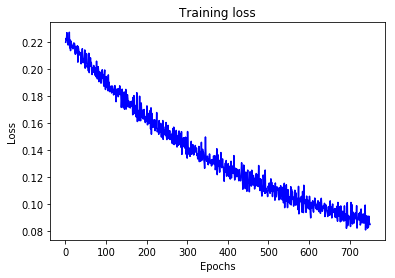

In [90]:
plt.show()

In [91]:
evaluation_results = model.evaluate(x_test_data, test_labels)

 32/100 [========>.....................] - ETA: 0s

In [92]:
evaluation_results

[10.768644618988038, 0.16]

In [93]:
type(evaluation_results)

list

In [98]:
train_acc = history["acc"]

plt.plot(epochs, train_acc, 'g')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training accuracy")
plt.legend()

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


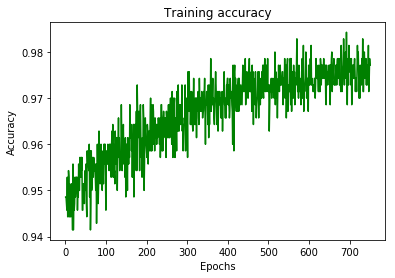

In [99]:
plt.show()